## Reddit Posts Fetch using Access Tokens in python

### 1. Create Reddit Account

You can create the reddit account by [Clicking Here](https://www.reddit.com/account/register/?dest=https%3A%2F%2Fwww.reddit.com%2F), but keep in mind to create account by email and password, please do not create account by clicking into **Continue with Google/Apple**.

### 2. Get your Developer API tokens || Yes! you are now a developer officailly :)  ||

Please Follow [This Link](https://github.com/reddit-archive/reddit/wiki/OAuth2)

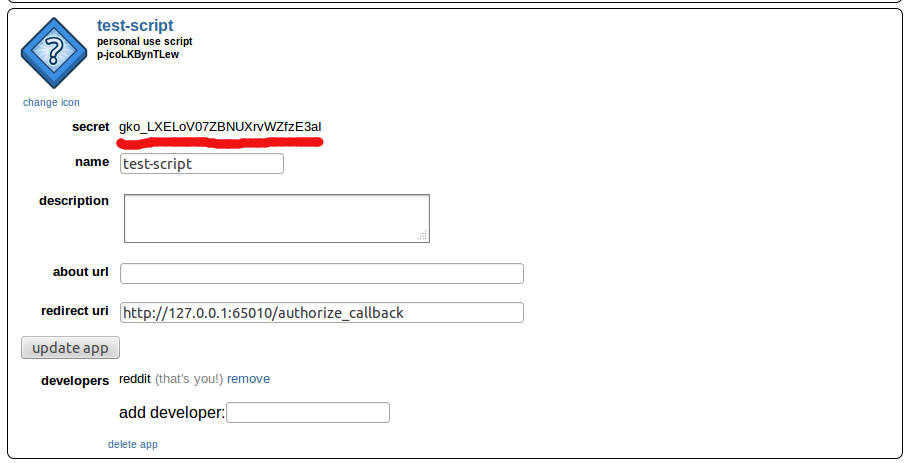

### 3. Create folder structure like this

```
<root_folder>
    |__ reddit_fetch.ipynb
    |__ .env
```

In ths `.env` file we will store the **secret values for security purpose obviously** in key value pair like
```
CLIENT_ID=<your personal use script>
SECRET_TOKEN=<your secret token>
USERNAME=<username for reddit>
PASSWORD=<password for reddit>
```

### 4. Install the following library

In [6]:
!pip install -U python-dotenv
!pip install pandas

In [14]:
import os
import json
import requests
from dotenv import load_dotenv
import pandas as pd

In [9]:
# It will load the .env file in the current folder by default
load_dotenv()

True

In [11]:
# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'token'
auth = requests.auth.HTTPBasicAuth(os.getenv("CLIENT_ID"), os.getenv("SECRET_TOKEN"))

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': os.getenv("USERNAME"),
        'password': os.getenv("PASSWORD")}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'POSM_bot/0.0.1'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

Yahh!! we authenticated successfully, now we will do some work

In [35]:
SUB_REDDIT = "socialmedia"

res = requests.get(f"https://oauth.reddit.com/r/{SUB_REDDIT}/hot",
                   headers=headers)

df = {
    'subreddit' : [],
    'title' : [],
    'selftext' : [],
    'upvote_ratio' : [],
    'ups' : [],
    'downs' : [],
    'score' : [],
}  

# loop through each post retrieved from GET request
for post in res.json()['data']['children']:
    df['subreddit'].append(post['data']['subreddit']),
    df['title'].append(post['data']['title']),
    df['selftext'].append(post['data']['selftext']),
    df['upvote_ratio'].append(post['data']['upvote_ratio']),
    df['ups'].append(post['data']['ups']),
    df['downs'].append(post['data']['downs'])
    df['score'].append(post['data']['score'])
    
df = pd.DataFrame(df)
df.head()

,subreddit,title,selftext,upvote_ratio,ups,downs,score
0,socialmedia,All new posts need a flair going forward,"Hello, \n\nWhen submitting a post, there is an...",0.98,111,0,111
1,socialmedia,New Job Listings,Are you looking to hire? \n\nShare your openin...,0.81,3,0,3
2,socialmedia,What is Happening with Social Media: Twitter’s...,#Twitter Algorithm Revealed \n\nThe platform r...,1.00,5,0,5
3,socialmedia,YouTube and its current algorithm,"I have an empty channel from 2014, no videos, ...",1.00,4,0,4
4,socialmedia,Anyone got any experience in putting content b...,Will leave link in comments if anyone like me...,0.81,3,0,3


In [39]:
print(df.iloc[2]['selftext'])

#Twitter Algorithm Revealed 

The platform revealed its algorithm on 31st March and here’s what I’ve learned about how it works. 

Yes, Twitter Algorithm seems to prioritise Blue subscribers &amp; they get more organic reach. 
Reddit like Algorithm, Likes on Twitters boost your content the most (around 10x) more than Retweets. And comments impact your organic reach by a tiny fraction of growth. 
Outbound links within tweets harm your engagement. This shouldn’t come as surprise because all of the platforms have similar algorithms for outbound links. They don’t want people living platform. 

That’s why always use comments or edit your post few hours later on LinkedIn &amp; Reddit to add links. First get the engagement! 

The algorithm also labels if tweet is from Elon Musk. And also tracks mention regarding other specific celebrities &amp; events to track trends across various channels consistently.

Your follower network defines your tweet engagement. From the starting you need to keep 